In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"ds_salaries.csv",index_col=0)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.shape  #rows,columns

(607, 11)

In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
df.isna().sum()   

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [52]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary_in_usd         369
employee_residence     55
remote_ratio            3
company_location       50
company_size            3
dtype: int64

Changing  names of categories in some columns to be more informative
Columns include:
1.experience_level
2.employment_type
3.remote_ratio
4.employ_residence
5.company_location
6.company_size

In [9]:
exp_level_dict = {'EN':'Entry Level/Junior',
                  'MI':'Mid Level/Intermediate',
                  'SE':'Senior Level/Expert',
                  'EX':'Executive Level/Expert'}
df['experience_level'] = df['experience_level'].map(exp_level_dict)


emp_type_dict = {'FT':'Full Time',
                  'PT':'Part Time',
                  'CT':'Contract',
                  'FL':'Freelance'}
df['employment_type'] = df['employment_type'].map(emp_type_dict)


remote_ratio_dict = {0:'No Remote',
                     50:'Partially Remote',
                     100:'Fully Remote'}
df['remote_ratio'] = df['remote_ratio'].map(remote_ratio_dict)


ISO3166 = {
	'AD': 'Andorra',
	'AE': 'United Arab Emirates',
	'AF': 'Afghanistan',
	'AG': 'Antigua & Barbuda',
	'AI': 'Anguilla',
	'AL': 'Albania',
	'AM': 'Armenia',
	'AN': 'Netherlands Antilles',
	'AO': 'Angola',
	'AQ': 'Antarctica',
	'AR': 'Argentina',
	'AS': 'American Samoa',
	'AT': 'Austria',
	'AU': 'Australia',
	'AW': 'Aruba',
	'AZ': 'Azerbaijan',
	'BA': 'Bosnia and Herzegovina',
	'BB': 'Barbados',
	'BD': 'Bangladesh',
	'BE': 'Belgium',
	'BF': 'Burkina Faso',
	'BG': 'Bulgaria',
	'BH': 'Bahrain',
	'BI': 'Burundi',
	'BJ': 'Benin',
	'BM': 'Bermuda',
	'BN': 'Brunei Darussalam',
	'BO': 'Bolivia',
	'BR': 'Brazil',
	'BS': 'Bahama',
	'BT': 'Bhutan',
	'BU': 'Burma (no longer exists)',
	'BV': 'Bouvet Island',
	'BW': 'Botswana',
	'BY': 'Belarus',
	'BZ': 'Belize',
	'CA': 'Canada',
	'CC': 'Cocos (Keeling) Islands',
	'CF': 'Central African Republic',
	'CG': 'Congo',
	'CH': 'Switzerland',
	'CI': 'Côte D\'ivoire (Ivory Coast)',
	'CK': 'Cook Iislands',
	'CL': 'Chile',
	'CM': 'Cameroon',
	'CN': 'China',
	'CO': 'Colombia',
	'CR': 'Costa Rica',
	'CS': 'Czechoslovakia (no longer exists)',
	'CU': 'Cuba',
	'CV': 'Cape Verde',
	'CX': 'Christmas Island',
	'CY': 'Cyprus',
	'CZ': 'Czech Republic',
	'DD': 'German Democratic Republic (no longer exists)',
	'DE': 'Germany',
	'DJ': 'Djibouti',
	'DK': 'Denmark',
	'DM': 'Dominica',
	'DO': 'Dominican Republic',
	'DZ': 'Algeria',
	'EC': 'Ecuador',
	'EE': 'Estonia',
	'EG': 'Egypt',
	'EH': 'Western Sahara',
	'ER': 'Eritrea',
	'ES': 'Spain',
	'ET': 'Ethiopia',
	'FI': 'Finland',
	'FJ': 'Fiji',
	'FK': 'Falkland Islands (Malvinas)',
	'FM': 'Micronesia',
	'FO': 'Faroe Islands',
	'FR': 'France',
	'FX': 'France, Metropolitan',
	'GA': 'Gabon',
	'GB': 'United Kingdom (Great Britain)',
	'GD': 'Grenada',
	'GE': 'Georgia',
	'GF': 'French Guiana',
	'GH': 'Ghana',
	'GI': 'Gibraltar',
	'GL': 'Greenland',
	'GM': 'Gambia',
	'GN': 'Guinea',
	'GP': 'Guadeloupe',
	'GQ': 'Equatorial Guinea',
	'GR': 'Greece',
	'GS': 'South Georgia and the South Sandwich Islands',
	'GT': 'Guatemala',
	'GU': 'Guam',
	'GW': 'Guinea-Bissau',
	'GY': 'Guyana',
	'HK': 'Hong Kong',
	'HM': 'Heard & McDonald Islands',
	'HN': 'Honduras',
	'HR': 'Croatia',
	'HT': 'Haiti',
	'HU': 'Hungary',
	'ID': 'Indonesia',
	'IE': 'Ireland',
	'IL': 'Israel',
	'IN': 'India',
	'IO': 'British Indian Ocean Territory',
	'IQ': 'Iraq',
	'IR': 'Islamic Republic of Iran',
	'IS': 'Iceland',
	'IT': 'Italy',
	'JM': 'Jamaica',
	'JO': 'Jordan',
	'JP': 'Japan',
	'KE': 'Kenya',
	'KG': 'Kyrgyzstan',
	'KH': 'Cambodia',
	'KI': 'Kiribati',
	'KM': 'Comoros',
	'KN': 'St. Kitts and Nevis',
	'KP': 'Korea, Democratic People\'s Republic of',
	'KR': 'Korea, Republic of',
	'KW': 'Kuwait',
	'KY': 'Cayman Islands',
	'KZ': 'Kazakhstan',
	'LA': 'Lao People\'s Democratic Republic',
	'LB': 'Lebanon',
	'LC': 'Saint Lucia',
	'LI': 'Liechtenstein',
	'LK': 'Sri Lanka',
	'LR': 'Liberia',
	'LS': 'Lesotho',
	'LT': 'Lithuania',
	'LU': 'Luxembourg',
	'LV': 'Latvia',
	'LY': 'Libyan Arab Jamahiriya',
	'MA': 'Morocco',
	'MC': 'Monaco',
	'MD': 'Moldova, Republic of',
	'MG': 'Madagascar',
	'MH': 'Marshall Islands',
	'ML': 'Mali',
	'MN': 'Mongolia',
	'MM': 'Myanmar',
	'MO': 'Macau',
	'MP': 'Northern Mariana Islands',
	'MQ': 'Martinique',
	'MR': 'Mauritania',
	'MS': 'Monserrat',
	'MT': 'Malta',
	'MU': 'Mauritius',
	'MV': 'Maldives',
	'MW': 'Malawi',
	'MX': 'Mexico',
	'MY': 'Malaysia',
	'MZ': 'Mozambique',
	'NA': 'Namibia',
	'NC': 'New Caledonia',
	'NE': 'Niger',
	'NF': 'Norfolk Island',
	'NG': 'Nigeria',
	'NI': 'Nicaragua',
	'NL': 'Netherlands',
	'NO': 'Norway',
	'NP': 'Nepal',
	'NR': 'Nauru',
	'NT': 'Neutral Zone (no longer exists)',
	'NU': 'Niue',
	'NZ': 'New Zealand',
	'OM': 'Oman',
	'PA': 'Panama',
	'PE': 'Peru',
	'PF': 'French Polynesia',
	'PG': 'Papua New Guinea',
	'PH': 'Philippines',
	'PK': 'Pakistan',
	'PL': 'Poland',
	'PM': 'St. Pierre & Miquelon',
	'PN': 'Pitcairn',
	'PR': 'Puerto Rico',
	'PT': 'Portugal',
	'PW': 'Palau',
	'PY': 'Paraguay',
	'QA': 'Qatar',
	'RE': 'Réunion',
	'RO': 'Romania',
	'RU': 'Russian Federation',
	'RW': 'Rwanda',
	'SA': 'Saudi Arabia',
	'SB': 'Solomon Islands',
	'SC': 'Seychelles',
	'SD': 'Sudan',
	'SE': 'Sweden',
	'SG': 'Singapore',
	'SH': 'St. Helena',
	'SI': 'Slovenia',
	'SJ': 'Svalbard & Jan Mayen Islands',
	'SK': 'Slovakia',
	'SL': 'Sierra Leone',
	'SM': 'San Marino',
	'SN': 'Senegal',
	'SO': 'Somalia',
	'SR': 'Suriname',
	'ST': 'Sao Tome & Principe',
	'SU': 'Union of Soviet Socialist Republics (no longer exists)',
	'SV': 'El Salvador',
	'SY': 'Syrian Arab Republic',
	'SZ': 'Swaziland',
	'TC': 'Turks & Caicos Islands',
	'TD': 'Chad',
	'TF': 'French Southern Territories',
	'TG': 'Togo',
	'TH': 'Thailand',
	'TJ': 'Tajikistan',
	'TK': 'Tokelau',
	'TM': 'Turkmenistan',
	'TN': 'Tunisia',
	'TO': 'Tonga',
	'TP': 'East Timor',
	'TR': 'Turkey',
	'TT': 'Trinidad & Tobago',
	'TV': 'Tuvalu',
	'TW': 'Taiwan, Province of China',
	'TZ': 'Tanzania, United Republic of',
	'UA': 'Ukraine',
	'UG': 'Uganda',
	'UM': 'United States Minor Outlying Islands',
	'US': 'United States of America',
	'UY': 'Uruguay',
	'UZ': 'Uzbekistan',
	'VA': 'Vatican City State (Holy See)',
	'VC': 'St. Vincent & the Grenadines',
	'VE': 'Venezuela',
	'VG': 'British Virgin Islands',
	'VI': 'United States Virgin Islands',
	'VN': 'Viet Nam',
	'VU': 'Vanuatu',
	'WF': 'Wallis & Futuna Islands',
	'WS': 'Samoa',
	'YD': 'Democratic Yemen (no longer exists)',
	'YE': 'Yemen',
	'YT': 'Mayotte',
	'YU': 'Yugoslavia',
	'ZA': 'South Africa',
	'ZM': 'Zambia',
	'ZR': 'Zaire',
	'ZW': 'Zimbabwe',
	'ZZ': 'Unknown or unspecified country'}
df['employee_residence'] = df['employee_residence'].map(ISO3166)
df['company_location'] = df['company_location'].map(ISO3166)



comp_size_dict = {'S':'Small',
                 'M':'Medium',
                 'L':'Large'}
df['company_size'] = df['company_size'].map(comp_size_dict)

In [10]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid Level/Intermediate,Full Time,Data Scientist,70000,EUR,79833,Germany,No Remote,Germany,Large
1,2020,Senior Level/Expert,Full Time,Machine Learning Scientist,260000,USD,260000,Japan,No Remote,Japan,Small
2,2020,Senior Level/Expert,Full Time,Big Data Engineer,85000,GBP,109024,United Kingdom (Great Britain),Partially Remote,United Kingdom (Great Britain),Medium
3,2020,Mid Level/Intermediate,Full Time,Product Data Analyst,20000,USD,20000,Honduras,No Remote,Honduras,Small
4,2020,Senior Level/Expert,Full Time,Machine Learning Engineer,150000,USD,150000,United States of America,Partially Remote,United States of America,Large


dropping the column of salary and salary_currency

In [13]:
col = ['salary','salary_currency']
df.drop(columns=col,axis=1,inplace=True)

In [14]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid Level/Intermediate,Full Time,Data Scientist,79833,Germany,No Remote,Germany,Large
1,2020,Senior Level/Expert,Full Time,Machine Learning Scientist,260000,Japan,No Remote,Japan,Small
2,2020,Senior Level/Expert,Full Time,Big Data Engineer,109024,United Kingdom (Great Britain),Partially Remote,United Kingdom (Great Britain),Medium
3,2020,Mid Level/Intermediate,Full Time,Product Data Analyst,20000,Honduras,No Remote,Honduras,Small
4,2020,Senior Level/Expert,Full Time,Machine Learning Engineer,150000,United States of America,Partially Remote,United States of America,Large


getting the count of top five most needed or trending jobs

In [26]:
five_mostneeded_job_title = df['job_title'].value_counts().head(5)
five_mostneeded_job_title

Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: job_title, dtype: int64

finding its percentage

In [ ]:
total_rows = df.shape[0]
five_mostneeded_job_title*100/total_rows

In [29]:
five_job_title_only = df[df['job_title'].isin([i for i in five_mostneeded_job_title.index])]

In [34]:
def my_catplot(variable:str, hue_order=None, title=None):
    sns.catplot(data=five_job_title_only, 
                x='job_title', 
                kind='count', 
                height=10, 
                hue=variable,
                hue_order=hue_order)

    plt.xticks(rotation=45)   #rotate x-axis label ny 45 degrees
    plt.ylabel('Count')
    plt.xlabel('Job Title')
    plt.title(title)
    ;

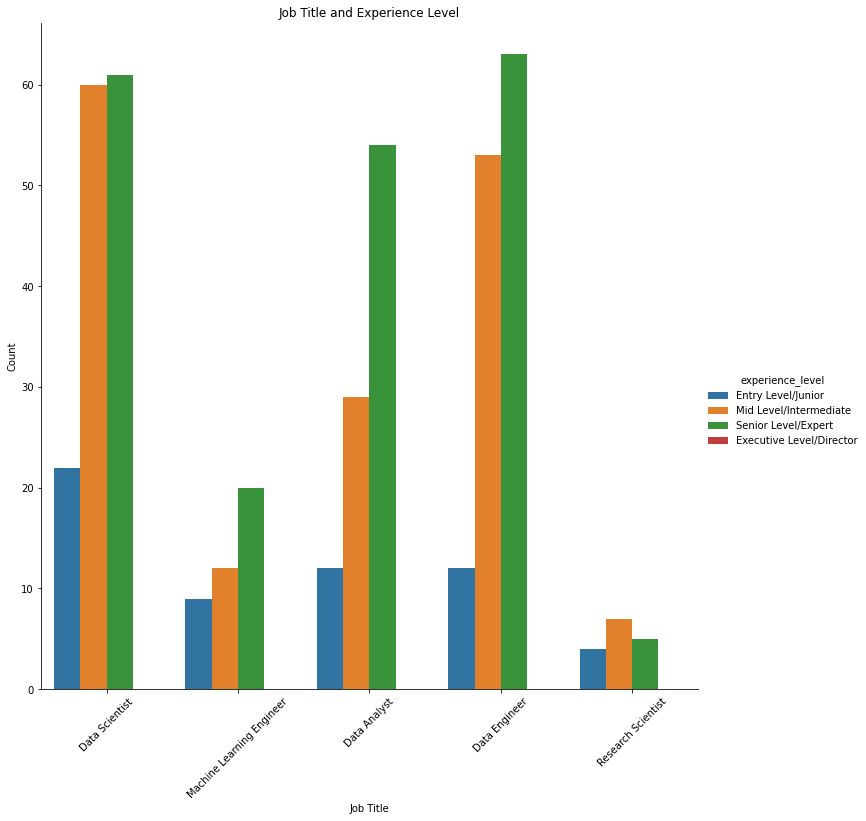

In [35]:
exp_order=['Entry Level/Junior','Mid Level/Intermediate','Senior Level/Expert','Executive Level/Director']

my_catplot(variable='experience_level', hue_order=exp_order, title='Job Title and Experience Level')

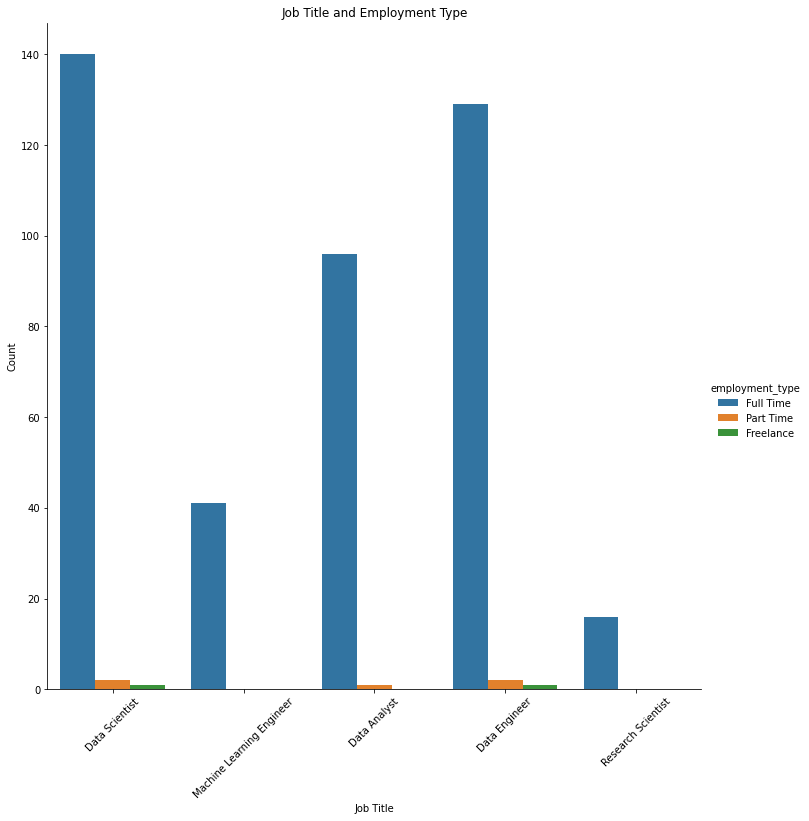

In [36]:
my_catplot(variable='employment_type', title='Job Title and Employment Type')

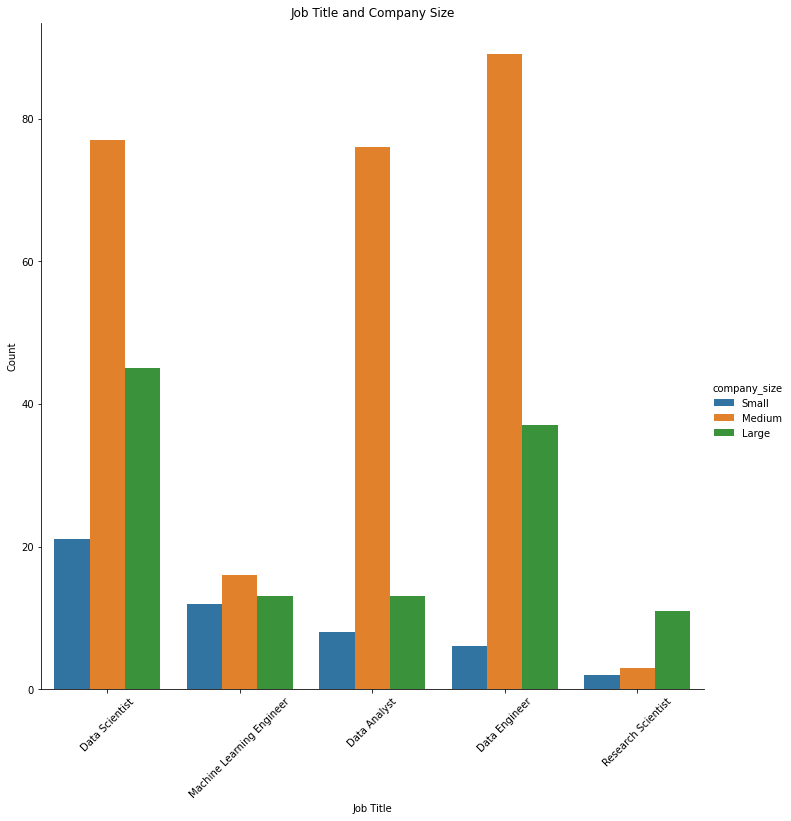

In [37]:
my_catplot(variable='company_size', hue_order = ['Small', 'Medium', 'Large'], title='Job Title and Company Size')

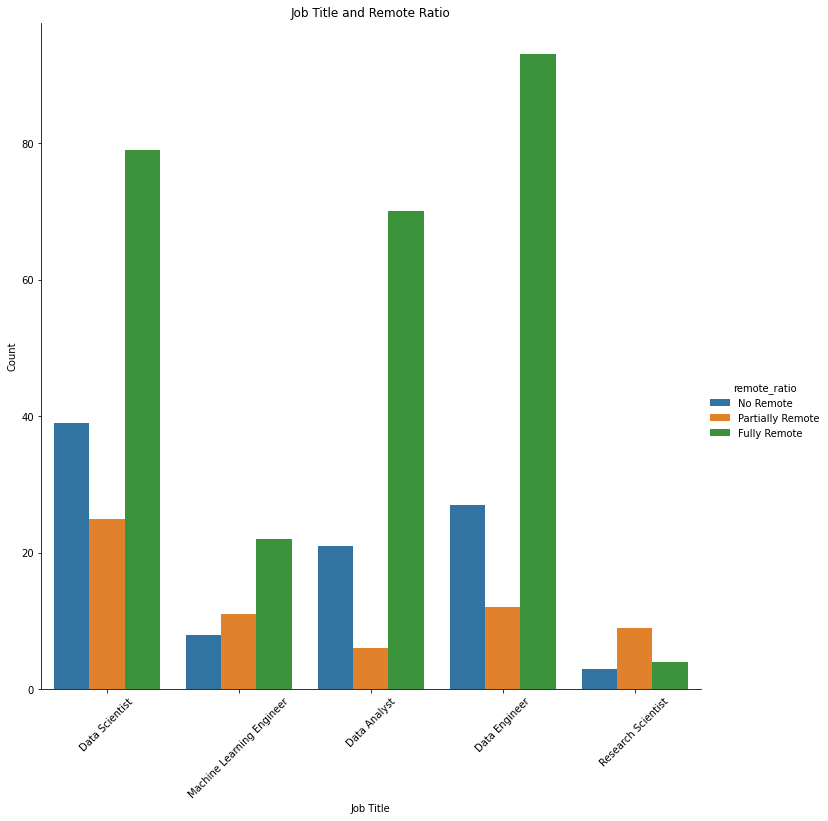

In [38]:
my_catplot(variable='remote_ratio', title='Job Title and Remote Ratio')

In [39]:
five_most_employee_residence = df['employee_residence'].value_counts().head(5)
five_most_employee_residence

United States of America          332
United Kingdom (Great Britain)     44
India                              30
Canada                             29
Germany                            25
Name: employee_residence, dtype: int64

In [40]:
five_most_company_location = df['company_location'].value_counts().head(5)
five_most_company_location

United States of America          355
United Kingdom (Great Britain)     47
Canada                             30
Germany                            28
India                              24
Name: company_location, dtype: int64

In [46]:
five_country_company_location = df['company_location'].value_counts().head(5)
five_country_only_company_location = df[df['company_location'].isin([i for i in five_country_company_location.index])]

In [47]:
company_country_high_paid = five_country_only_company_location[['company_location', 'salary_in_usd']].groupby(by='company_location').mean().sort_values(by='salary_in_usd', ascending=False)

''

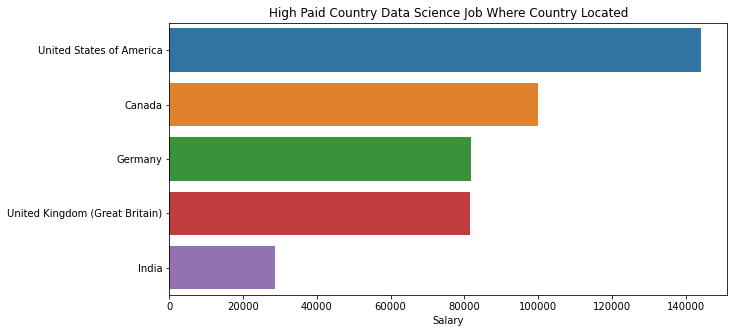

In [48]:
plt.figure(figsize=(10, 5))

sns.barplot(data=company_country_high_paid, y=company_country_high_paid.index, x='salary_in_usd')

plt.ylabel('')
plt.xlabel('Salary')
plt.title('High Paid Country Data Science Job Where Country Located')
;

In [49]:
five_country_employee_residence = df['employee_residence'].value_counts().head(5)
five_country_only_employee_residence = df[df['employee_residence'].isin([i for i in five_country_employee_residence.index])]
 
employee_country_high_paid = five_country_only_employee_residence[['employee_residence', 'salary_in_usd']]
                            .groupby(by='employee_residence').mean().sort_values(by='salary_in_usd', ascending=False)

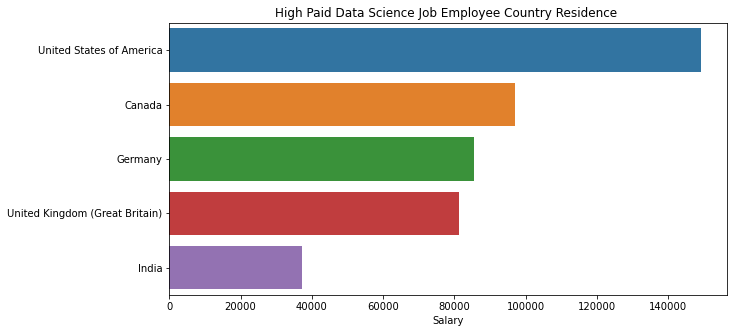

In [50]:
plt.figure(figsize=(10, 5))

sns.barplot(data=employee_country_high_paid, y=employee_country_high_paid.index, x='salary_in_usd')

plt.ylabel('')
plt.xlabel('Salary')
plt.title('High Paid Data Science Job Employee Country Residence ');

In [54]:
df.set_index('salary_in_usd')

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
salary_in_usd,,,,,,,,
79833,2020,Mid Level/Intermediate,Full Time,Data Scientist,Germany,No Remote,Germany,Large
260000,2020,Senior Level/Expert,Full Time,Machine Learning Scientist,Japan,No Remote,Japan,Small
109024,2020,Senior Level/Expert,Full Time,Big Data Engineer,United Kingdom (Great Britain),Partially Remote,United Kingdom (Great Britain),Medium
20000,2020,Mid Level/Intermediate,Full Time,Product Data Analyst,Honduras,No Remote,Honduras,Small
150000,2020,Senior Level/Expert,Full Time,Machine Learning Engineer,United States of America,Partially Remote,United States of America,Large
...,...,...,...,...,...,...,...,...
154000,2022,Senior Level/Expert,Full Time,Data Engineer,United States of America,Fully Remote,United States of America,Medium
126000,2022,Senior Level/Expert,Full Time,Data Engineer,United States of America,Fully Remote,United States of America,Medium
129000,2022,Senior Level/Expert,Full Time,Data Analyst,United States of America,No Remote,United States of America,Medium


In [10]:
int_exp = {"experience_level":{'EN': 0,
                                'MI':1,
                                'SE':2,
                                'EX':3}}

int_emptype = {"employment_type":{'FT':100,
                                  'PT':50,
                                  'CT':70,
                                  'FL':60}}
int_compsize = {"company_size":{'S':0,
                                'M':5,
                                'L':10}}


In [16]:
int_exp = {"experience_level":{'EN': 0,
                                'MI':1,
                                'SE':2,
                                'EX':3}}
df = df.replace(int_exp)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,1,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,2,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,2,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,1,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,2,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [18]:
int_emptype = {"employment_type":{'FT':100,
                                  'PT':50,
                                  'CT':70,
                                  'FL':60}}
df = df.replace(int_emptype)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,1,100,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,2,100,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,2,100,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,1,100,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,2,100,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [19]:
int_compsize = {"company_size":{'S':0,
                                'M':5,
                                'L':10}}
df = df.replace(int_compsize)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,1,100,Data Scientist,70000,EUR,79833,DE,0,DE,10
1,2020,2,100,Machine Learning Scientist,260000,USD,260000,JP,0,JP,0
2,2020,2,100,Big Data Engineer,85000,GBP,109024,GB,50,GB,5
3,2020,1,100,Product Data Analyst,20000,USD,20000,HN,0,HN,0
4,2020,2,100,Machine Learning Engineer,150000,USD,150000,US,50,US,10
